In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [2]:
conn = sqlite3.connect('main_normalized.db')
cur = conn.cursor()


In [3]:
sql='''
    WITH ROUTE_TABLE AS 
    (
    SELECT COUNT(RouteID)route_freq,RouteID 
    FROM flights 
    GROUP BY RouteID
    )
    SELECT route_freq,Source,Destination 
    FROM ROUTE_TABLE    
    INNER JOIN routes r ON ROUTE_TABLE.RouteID=r.RouteID
    ORDER BY -route_freq
    LIMIT 20
    '''

In [4]:
top_10_routes=pd.read_sql_query(sql,con=conn).loc[:,['Source',"Destination"]]

In [5]:
top_10_routes=tuple(top_10_routes.values)

In [6]:
def get_route(route):
    sql=f'''
        WITH TIME_TABLE AS 
        (
            SELECT
                CASE
                WHEN strftime('%m', FlightDate) = '01' THEN 'January'
                WHEN strftime('%m', FlightDate) = '02' THEN 'February'
                WHEN strftime('%m', FlightDate) = '03' THEN 'March'
                WHEN strftime('%m', FlightDate) = '04' THEN 'April'
                WHEN strftime('%m', FlightDate) = '05' THEN 'May'
                WHEN strftime('%m', FlightDate) = '06' THEN 'June'
                WHEN strftime('%m', FlightDate) = '07' THEN 'July'
                WHEN strftime('%m', FlightDate) = '08' THEN 'August'
                WHEN strftime('%m', FlightDate) = '09' THEN 'September'
                WHEN strftime('%m', FlightDate) = '10' THEN 'October'
                WHEN strftime('%m', FlightDate) = '11' THEN 'November'
                WHEN strftime('%m', FlightDate) = '12' THEN 'December'
            END FlightDate,
            Source,Destination
            FROM flights F
            INNER JOIN routes r ON r.RouteID=F.RouteID
            WHERE Source='{top_10_routes[route][0]}' AND Destination='{top_10_routes[route][1]}'
        )
        SELECT *,COUNT(*)freq FROM TIME_TABLE
        GROUP BY FlightDate
        '''
    return sql,top_10_routes[route][0],top_10_routes[route][1]

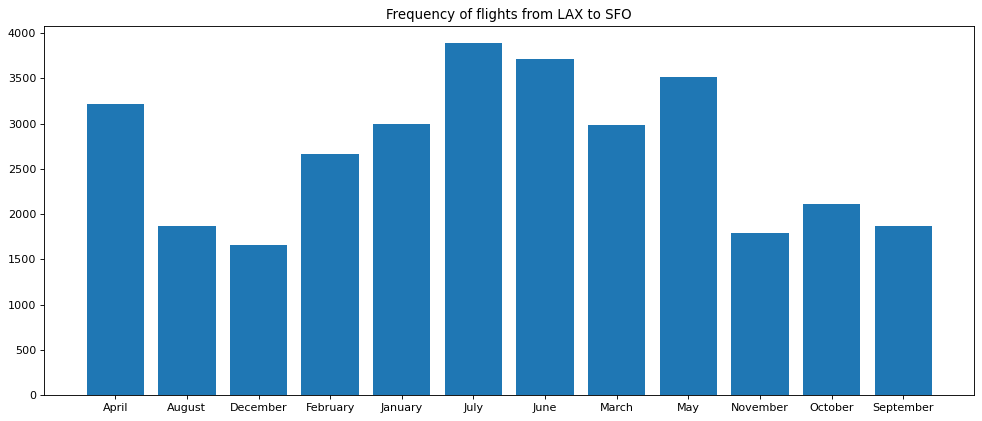

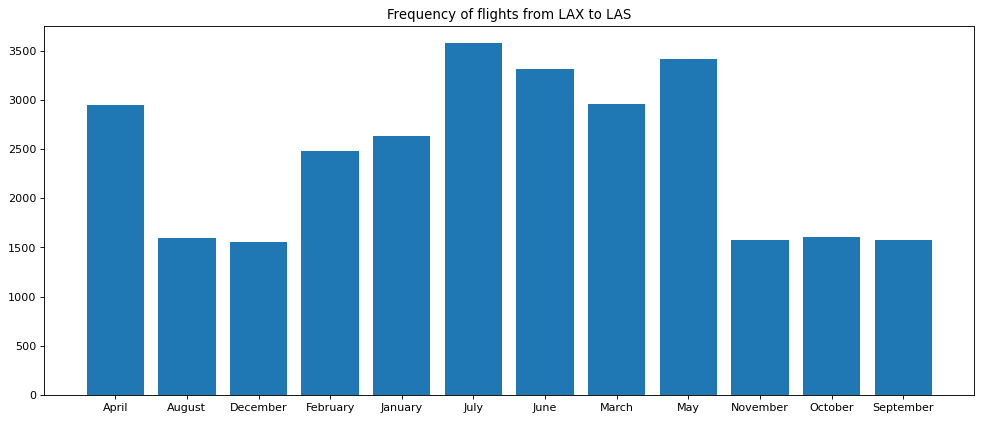

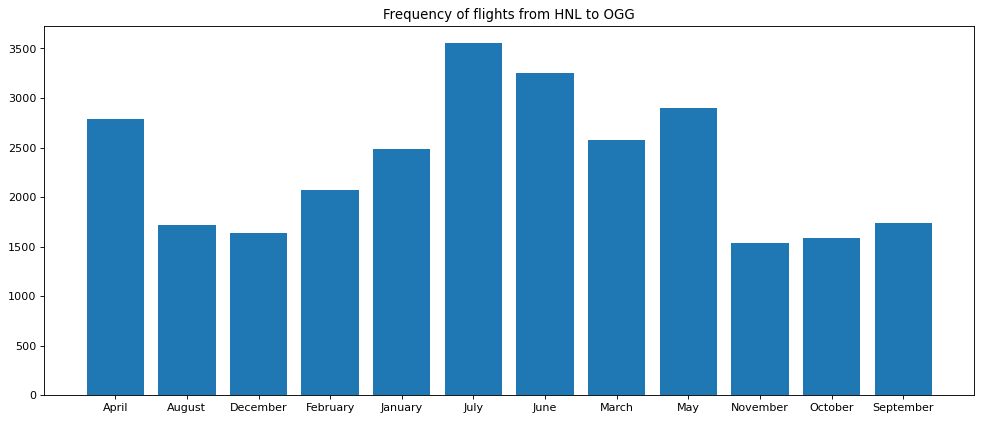

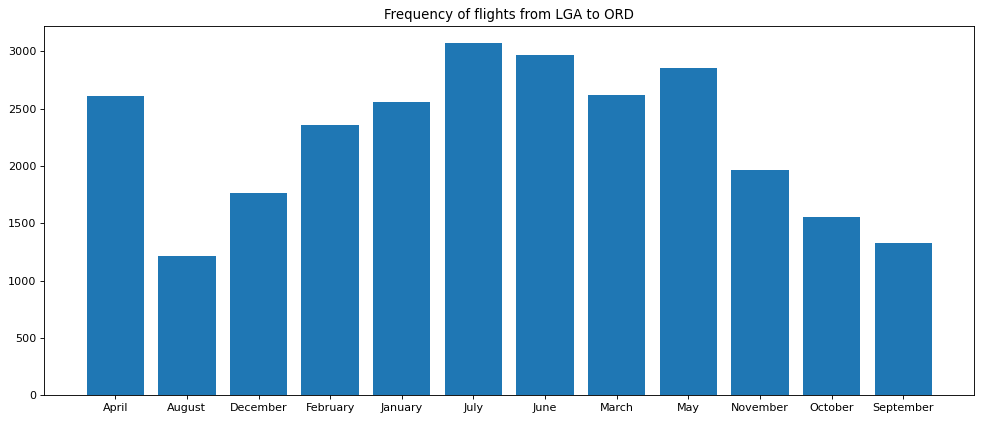

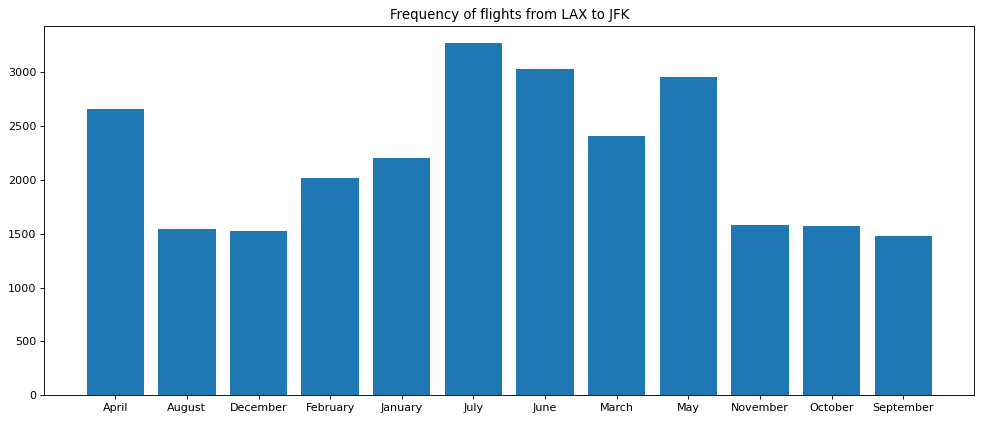

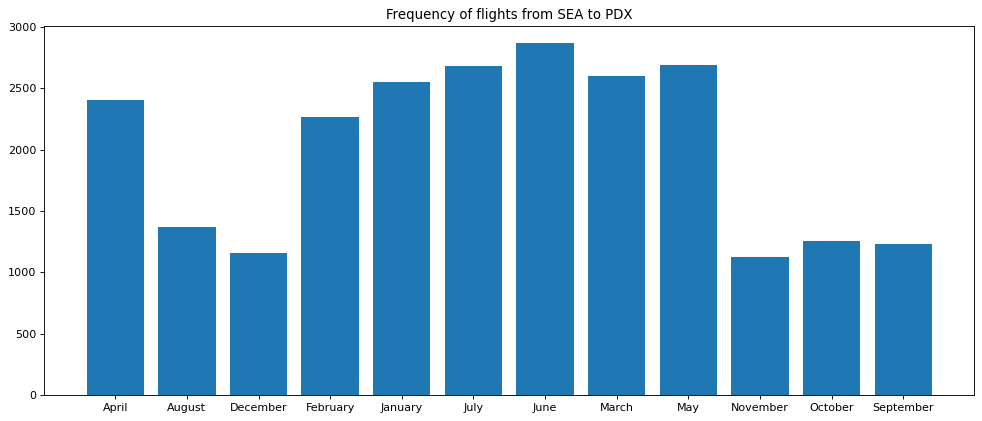

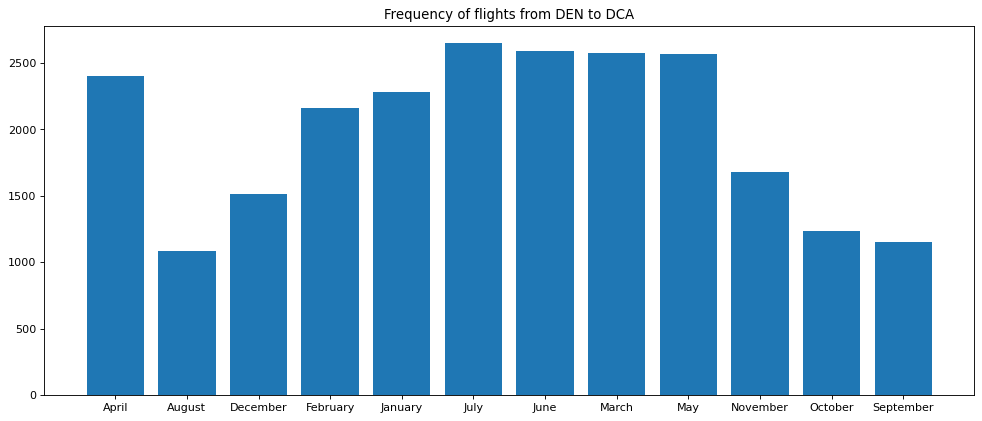

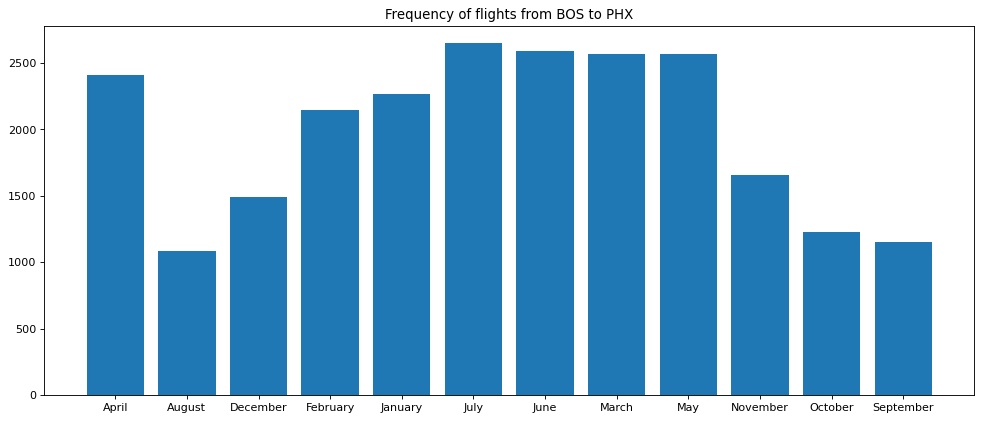

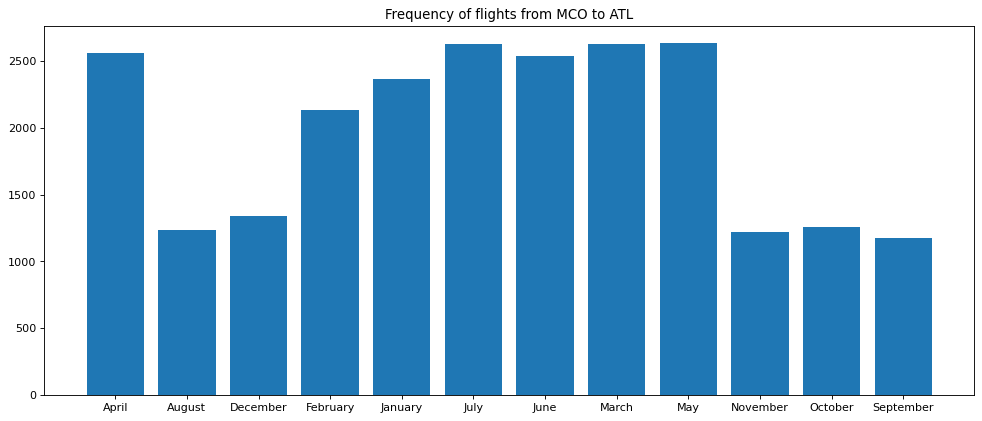

In [ ]:
for i in range(20):

    if i%2==0:
        sql,source,dest=get_route(i)
        route1=pd.read_sql_query(sql,con=conn)
        route1_name=route1.loc[:,"Source"].values[0]
    else:
        sql,source,dest=get_route(i)
        route2=pd.read_sql_query(sql,con=conn)
        route2_name=route2.loc[:,"Source"].values[0]
        
        route_comb=pd.concat([route1,route2])
        sum_df=route_comb.groupby("FlightDate").sum("freq")
        figure(figsize=(15, 6), dpi=80)

        plt.bar(sum_df.index,su['freq'].values)
        plt.title(f"Frequency of flights from {route1_name} to {route2_name}")
        plt.show()
        